# Install required libraries¶

In [1]:
%pip install seaborn
import piplite

await piplite.install(['nbformat', 'plotly'])

## Dataset URL from the GenAI lab

In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"

## Downloading the dataset

In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = URL

await download(path, "dataset.csv")

## Importing the Dataset

In [5]:
import pandas as pd

# Specify the file path where the CSV file is located
#file_path = "path/to/your/file.csv"

# Read the CSV file into a pandas dataframe
df = pd.read_csv('dataset.csv')

# Print the first 5 rows of the dataframe
df.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500


# Data Preparation

## Data Cleaning

In [6]:
# Identify columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()].tolist()
print("Columns with missing values:", columns_with_missing_values)

# Replace missing values with mean value of the column
for col in columns_with_missing_values:
    mean_value = df[col].mean()
    df[col].fillna(mean_value, inplace=True)

# Delete duplicate entries
df.drop_duplicates(inplace=True)

print("Updated data frame:")
df.head()

Columns with missing values: ['tax']


<ipython-input-6-4eb88487d0b8>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_value, inplace=True)


Updated data frame:


,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Fiesta,2017,Automatic,15944,Petrol,150.0,57.7,1.0,12000
1,Focus,2018,Manual,9083,Petrol,150.0,57.7,1.0,14000
2,Focus,2017,Manual,12456,Petrol,150.0,57.7,1.0,13000
3,Fiesta,2019,Manual,10460,Petrol,145.0,40.3,1.5,17500
4,Fiesta,2019,Automatic,1482,Petrol,145.0,48.7,1.0,16500


## Data Insights and Visualization

### Identify the 5 attributes that have the highest correlation with the price parameter.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17812 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17812 non-null  object 
 1   year          17812 non-null  int64  
 2   transmission  17812 non-null  object 
 3   mileage       17812 non-null  int64  
 4   fuelType      17812 non-null  object 
 5   tax           17812 non-null  float64
 6   mpg           17812 non-null  float64
 7   engineSize    17812 non-null  float64
 8   price         17812 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.2+ MB


In [12]:
"""# Calculate the correlation matrix
correlation_matrix = df.corr()

# Select the correlations with the target attribute
target_correlations = correlation_matrix['price'].drop('price')

# Get the top 5 attributes with the highest correlation
top_5_attributes = target_correlations.abs().nlargest(5)

print("Top 5 attributes with highest correlation to the target:")
print(top_5_attributes)"""

'# Calculate the correlation matrix\ncorrelation_matrix = df.corr()\n\n# Select the correlations with the target attribute\ntarget_correlations = correlation_matrix[\'price\'].drop(\'price\')\n\n# Get the top 5 attributes with the highest correlation\ntop_5_attributes = target_correlations.abs().nlargest(5)\n\nprint("Top 5 attributes with highest correlation to the target:")\nprint(top_5_attributes)'

#### Count the number of cars under each unique value of fuelType attribute.

In [14]:
# Count the occurrences of each unique value in the 'Category' column
value_counts = df['fuelType'].value_counts()

print("Number of entries for each unique value in 'Category':")
value_counts

Number of entries for each unique value in 'Category':


fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64

#### Create a Box plot to determine whether cars with automatic, manual or semi-auto type of transmission have more price outliers. Use the Seaborn library for creating the plot.

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


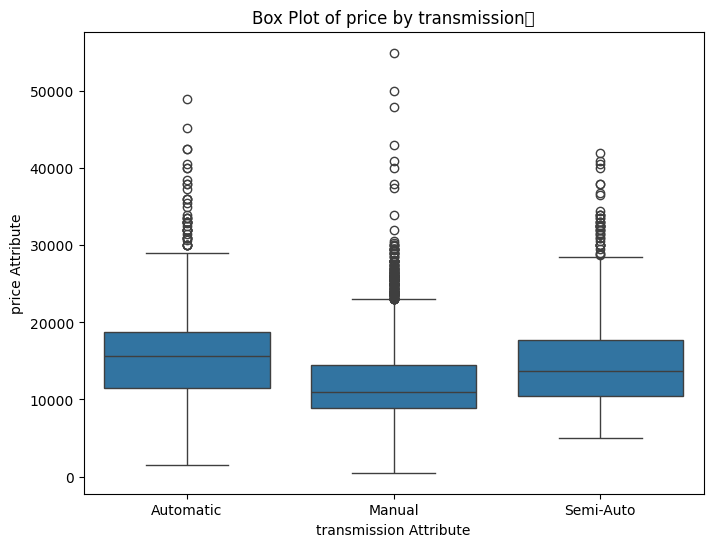

In [17]:
# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='transmission', y='price', data=df)

# Add titles and labels
plt.title('Box Plot of price by transmission	')
plt.xlabel('transmission Attribute')
plt.ylabel('price Attribute')

# Show plot
plt.show()

#### Generate the regression plot between mpg parameter and the price to determine the correlation type between the two.

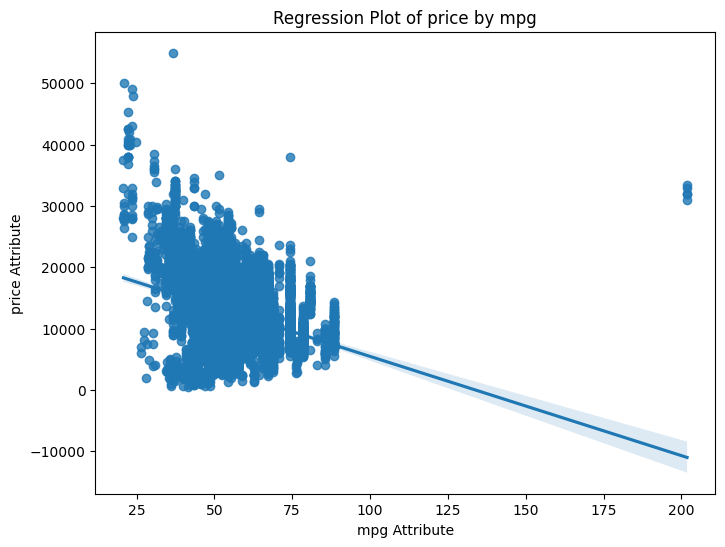

In [18]:
# Create a regression plot
plt.figure(figsize=(8, 6))
sns.regplot(x='mpg', y='price', data=df)

# Add titles and labels
plt.title('Regression Plot of price by mpg')
plt.xlabel('mpg Attribute')
plt.ylabel('price Attribute')

# Show plot
plt.show()

## Model Development and Evaluation

#### Fit a linear regression model to predict the price using the feature mpg. Then calculate the R^2 and MSE values for the model.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
# Define the source and target variables
X = df[['mpg']]  # Features (source variable)
y = df['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate R² and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R² Value: {r2}')
print(f'Mean Squared Error: {mse}')

R² Value: 0.1504343741072478
Mean Squared Error: 19049855.140110757


#### Fit a linear regression model to predict the price using the following set of features.year, mileage, tax, mpg and engineSize.Calculate the R^2 and MSE values for this model.

In [21]:
# Define the source variables and target variable
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]  # Features
y = df['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate R² and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R² Value: {r2}')
print(f'Mean Squared Error: {mse}')

R² Value: 0.6917125923771564
Mean Squared Error: 6912744.910746688


##### For the same set of features as in the question above, create a pipeline model object that uses standard scalar, second degree polynomial features and a linear regression model. Calculate the R^2 value and the MSE value for this model.

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [23]:
# Define the source variables and target variable
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]  # Features
y = df['price']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),                # StandardScaler
    ('poly_features', PolynomialFeatures(degree=2)),  # Polynomial Features
    ('lin_reg', LinearRegression())              # Linear Regression
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate R² and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R² Value: {r2}')
print(f'Mean Squared Error: {mse}')

R² Value: 0.12122807147174242
Mean Squared Error: 19704749.61491952


#### For the same set of features, split the data into training and testing data parts. Assume testing part to be 20%. Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.

In [24]:
from sklearn.linear_model import Ridge

In [25]:
# Define the source variables and target variable
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]  # Features
y = df['price']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a Ridge regression model with regularization parameter 0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test)

# Calculate MSE and R² values
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Value: {r2}')

Mean Squared Error: 6912725.801054926
R² Value: 0.6917134446113138


#### Perform a second order polynomial transform on both the training data and testing data created for the question above. Create and fit a Ridge regression object using the modified training data, set the regularisation parameter to 0.1, and calculate the R^2 and MSE utilising the modified test data.

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [27]:
# Define the source variables and target variable
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]  # Features
y = df['price']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with polynomial features and Ridge regression
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),  # Second degree polynomial features
    ('scaler', StandardScaler()),                       # StandardScaler
    ('ridge', Ridge(alpha=0.1))                        # Ridge regression
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate MSE and R² values
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Value: {r2}')

Mean Squared Error: 6919635.706767183
R² Value: 0.6914052838233121


#### In the question above, perform a Grid Search on ridge regression for a set of values of alpha {0.01, 0.1, 1, 10, 100} with 4-fold cross validation to find the optimum value of alpha to be used for the prediction model.

In [28]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge

In [31]:
# Define the source variables and target variable
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]  # Features
y = df['price']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with polynomial features and Ridge regression
pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),  # Second degree polynomial features
    ('scaler', StandardScaler()),                       # StandardScaler
    ('ridge', Ridge())                                 # Placeholder for Ridge regression
])

# Define the grid of hyperparameters to search
param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100]  # Set of values for the alpha parameter
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=4, scoring='neg_mean_squared_error')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate MSE and R² values
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Best Alpha: {grid_search.best_params_["ridge__alpha"]}')
print(f'Mean Squared Error: {mse}')
print(f'R² Value: {r2}')

Best Alpha: 0.01
Mean Squared Error: 8943741.429414164
R² Value: 0.6011363220655437
